<a href="https://colab.research.google.com/github/fabriciosantana/nlp/blob/main/AKCIT_NLP_M4_Colab_Unidade_10_Finalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos de Aprendizagem

*   Compreender os conceitos fundamentais de clusterização e o funcionamento do algoritmo k-means;
* Aplicar técnicas de redução de dimensionalidade e visualização de dados para interpretar resultados de clusterização;
* Desenvolver competências na análise comparativa de resultados de clusterização com dados rotulados e não rotulados.


# Clusterização com o K-Means
Neste notebook, vamos explorar o algoritmo de clusterização k-means aplicado ao famoso dataset Iris. Este conjunto de dados contém informações sobre 150 amostras de flores de íris, divididas em três espécies diferentes. Embora o dataset seja rotulado, vamos utilizá-lo para aplicar o algoritmo k-means, que é um método não supervisionado, para comparar os resultados obtidos com as classes originais.

## O que vamos fazer?
O objetivo aqui é aplicar o k-means para identificar possíveis agrupamentos nas amostras do dataset Iris, mesmo sabendo que os dados já possuem rótulos. Inicialmente, usaremos os rótulos para exibir um gráfico de dispersão dos dados originais. Em seguida, retiraremos a coluna que identifica as classes e aplicaremos o k-means, gerando um gráfico para comparar visualmente os resultados.

## Montagem do Google Drive
Primeiro, precisamos acessar os arquivos armazenados no Google Drive. Usaremos o comando `drive.mount` para montar o Google Drive no ambiente Colab, permitindo acessar os arquivos diretamente.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Monta o drive do Google Drive

Mounted at /content/drive


O código acima monta o Google Drive no diretório `/content/drive`, permitindo que você acesse seus arquivos diretamente no ambiente Colab.

## Introdução à biblioteca Pandas
Pandas é uma poderosa biblioteca de Python para análise e manipulação de dados. Ela fornece estruturas de dados flexíveis, como DataFrames e Series, que facilitam o tratamento de dados tabulares (similar a tabelas em bancos de dados ou planilhas). Pandas é particularmente útil para carregar, limpar, transformar e analisar dados. Ele pode manipular vários tipos de dados, incluindo arquivos CSV, planilhas Excel, tabelas SQL, e muito mais.

Abaixo você encontras uma explicação detalhada cada uma delas:

DataFrame
* O que é: Um DataFrame é uma estrutura de dados bidimensional (tabular), similar a uma tabela em uma base de dados ou a uma planilha em Excel. Ele é composto por linhas e colunas, onde cada coluna pode conter diferentes tipos de dados (números, strings, booleanos, etc.).
* Características:
 * Etiquetado: As linhas e colunas de um DataFrame são etiquetadas, o que significa que você pode acessar os dados através de rótulos (ou índices) em vez de apenas por posição.
 * Flexível: Pode armazenar diferentes tipos de dados em colunas diferentes, por exemplo, inteiros em uma coluna, strings em outra, e assim por diante.
 * Manipulação e análise: É amplamente utilizado para operações de filtragem, agregação, pivotamento, e outras formas de manipulação de dados.
* Exemplo: Imagine um DataFrame com as colunas "Nome", "Idade", e "Cidade". Cada linha desse DataFrame representa uma pessoa diferente, com os valores dessas três características.

Series
* O que é: Uma Series é uma estrutura de dados unidimensional, similar a uma coluna de uma tabela ou a uma lista. É essencialmente uma lista de elementos com rótulos (índices), o que a torna uma versão mais poderosa de um array do NumPy.
* Características:
 * Etiquetado: Cada elemento de uma Series tem um rótulo de índice associado, o que facilita o acesso a dados específicos.
Homogênea: Todos os elementos de uma Series são do mesmo tipo de dados (inteiros, strings, etc.).
 * Parte de um DataFrame: Uma Series pode ser vista como uma coluna individual em um DataFrame, mas também pode existir independentemente.
* Exemplo: A coluna "Nome" desse DataFrame pode ser extraída como uma Series, contendo apenas os nomes das pessoas, etiquetados pelos índices das linhas.

Antes de executar o código a seguir, [clique aqui](https://drive.google.com/file/d/1p3IEjwzthh3iXh4O2LUEvF8ySJd1Kjrq/view?usp=drive_link) para baixar o arquivo `iris-dataset.csv` e salve-o na pasta raiz (fora que qualquer diretório) do Google Drive vinculado à conta que você está utilizando para acessar esse *notebook*.

In [ ]:
import pandas as pd
filename = '/content/drive/My Drive/Colab Notebooks/iris-dataset.csv'
data = pd.read_csv(filename) # Lê o arquivo do dataset iris em um dataframe

O comando `pd.read_csv(filename)` lê o arquivo CSV e cria um DataFrame `data` contendo todas as amostras e características do dataset Iris. Esse DataFrame é essencial para manipulação e análise dos dados.

## Explorando o dataset
Vamos explorar rapidamente o dataset visualizando os primeiros registros e listando as colunas do DataFrame. Isso nos ajuda a entender a estrutura dos dados que estamos manipulando.

In [ ]:
data.head() # Mostra os primeiros registros do dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
list(data.columns) # Mostra os nomes das colunas do dataframe

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

Os primeiros registros do DataFrame e a lista de colunas nos permitem verificar se os dados foram carregados corretamente. As colunas do dataset Iris geralmente incluem medidas como comprimento e largura das sépalas e pétalas, além da espécie da flor.

## Preparação dos dados
Agora, vamos separar as características (atributos) que serão usadas para a clusterização. Neste exemplo, vamos utilizar as quatro primeiras colunas do DataFrame, que representam as medidas das flores.

In [ ]:
X = data.iloc[: , 0:4].values # Separa somente as colunas das características

O código acima utiliza `iloc` para selecionar as quatro primeiras colunas do DataFrame `data` e armazena essas colunas na matriz `X`. Essa matriz será usada como entrada para o algoritmo de clusterização.

## Redução de dimensionalidade com t-SNE
Antes de aplicar o algoritmo k-means, vamos reduzir a dimensionalidade dos dados usando t-SNE (t-Distributed Stochastic Neighbor Embedding). O t-SNE é uma técnica de redução de dimensionalidade particularmente útil para visualizar dados de alta dimensão. Ele transforma os dados de um espaço de características de alta dimensão para um espaço de 2 ou 3 dimensões, mantendo as relações de proximidade entre as amostras, o que é ideal para visualizar agrupamentos em um gráfico.

In [ ]:
from sklearn.manifold import TSNE # Classe para redução da dimensionalidade
X_tsne = TSNE(n_components = 2).fit_transform(X) # Reduz de 4 para 2 características

O código aplica t-SNE para reduzir as quatro dimensões das características do dataset Iris para duas. A redução de dimensionalidade é especialmente útil quando queremos visualizar dados em um espaço 2D ou 3D sem perder muita informação sobre as relações entre as amostras.

## Preparação para visualização
Agora que os dados foram reduzidos para duas dimensões, vamos organizá-los em um novo DataFrame, juntamente com as classes originais (espécies de íris) para facilitar a visualização.

In [ ]:
data_tsne = pd.DataFrame(X_tsne) # Transforma as amostras obtidas pelo TSNE em dataframe
classes = data.iloc[: , 4] # Extrai a coluna dos rótulos das classes
data_tsne.insert(2, 'classe', classes) # Reúne as amostras e os rótulos das classes
data_tsne = data_tsne.rename(columns = {0: "carac_tsne_0", 1: "carac_tsne_1"}) # Altera os nomes das colunas

Aqui, criamos um novo DataFrame `data_tsne` que contém as duas dimensões resultantes do t-SNE e as classes das amostras. As colunas são renomeadas para refletir as novas características derivadas do t-SNE, facilitando a interpretação. Resta plotar esses dados em um gráfico de dispersão.

## Introdução à biblioteca Seaborn
Seaborn é uma biblioteca Python baseada no Matplotlib que facilita a criação de gráficos estatísticos. Ela fornece uma interface de alto nível para desenhar gráficos atraentes e informativos. Seaborn integra bem com Pandas DataFrames, tornando muito simples a criação de gráficos a partir de dados tabulares. Seus recursos incluem gráficos de dispersão, gráficos de linha, gráficos de distribuição, gráficos de boxplot, entre outros.

<Axes: xlabel='carac_tsne_0', ylabel='carac_tsne_1'>

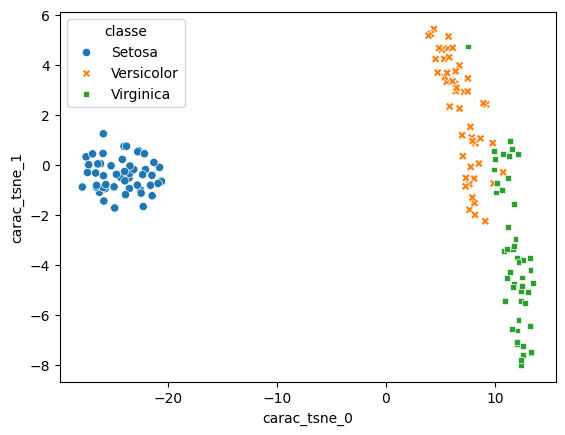

In [ ]:
import seaborn as sns
sns.scatterplot(x = data_tsne['carac_tsne_0'], y = data_tsne['carac_tsne_1'], hue = data_tsne.classe, style = data_tsne.classe)

Utilizamos a função `scatterplot` para gerar o gráficos com os seguinte parâmetros:

* `x = data_tsne['carac_tsne_0']`: Define os valores para o eixo x do gráfico, que correspondem à primeira característica reduzida pelo t-SNE.
* `y = data_tsne['carac_tsne_1']`: Define os valores para o eixo y do gráfico, que correspondem à segunda característica reduzida pelo t-SNE.
* `hue = data_tsne.classe`: Determina a coloração dos pontos no gráfico com base na classe de cada amostra. Isso permite distinguir visualmente as diferentes classes (ou clusters) no gráfico.
* `style = data_tsne.classe`: Diferencia as classes usando diferentes estilos de marcadores (como círculos, quadrados, etc.), proporcionando uma camada adicional de distinção visual entre as classes.

O gráfico de dispersão mostra como as amostras são distribuídas em um espaço bidimensional após a redução de dimensionalidade. As cores e os estilos indicam as diferentes classes, facilitando a visualização de possíveis agrupamentos naturais nos dados.

## Aplicando o algoritmo K-Means
Agora que temos uma visualização inicial dos dados rotulados, vamos aplicar o algoritmo de clusterização k-means sem os rótulos das classes, ou seja, um aprendizado não supervisionado e verificar o resultado. Assim podemos comparar os 2 agrupamentos e, visualmente, checar a acurácia o k-means. K-means tenta dividir os dados em 'k' clusters, onde cada amostra pertence ao cluster mais próximo de seu centro (centroide). Após a aplicação do k-means, vamos visualizar os clusters obtidos e compará-los com as classes originais.

In [ ]:
from sklearn.cluster import KMeans # Importação do algoritmo k - means
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300,  tol = 1e-04, random_state = 0) # Parametrização do modelo
km.fit(X_tsne) # Computa os centroides dos clusters

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

No código acima, criamos um modelo k-means com os seguintes parâmetros:

- **n_clusters**: Define o número de clusters a serem formados. Como sabemos que o dataset Iris tem três classes, usamos `n_clusters=3`. EM uma aplicação no mundo real esse número poderia ser escolhido com base no objetivo do agrupamento ou no deliamento experimental realizado por um especialista.
- **init**: Método para inicialização dos centroides. Usamos `random` para escolher centroides iniciais aleatoriamente.
- **n_init**: Número de vezes que o algoritmo k-means será executado com diferentes centroides iniciais. O melhor resultado (com menor inércia) é retornado.
- **max_iter**: Número máximo de iterações para uma única execução do k-means.
- **tol**: Tolerância para declarar convergência, ou seja, o critério de parada baseado em pequenas variações na inércia.
- **random_state**: Define a semente do gerador de números aleatórios para garantir reprodutibilidade.

### Predição e atribuição aos Clusters
Após ajustar o modelo aos dados com `fit`, podemos prever a qual cluster cada amostra pertence usando `predict`. Essa etapa associa cada amostra ao cluster mais próximo, com base na distância ao centroide do cluster.

In [ ]:
predicao = km.predict(X_tsne) # Associa os objetos aos índices da classe

O método `predict` retorna uma lista de rótulos de cluster, onde cada elemento indica o cluster ao qual a amostra correspondente pertence. Essa lista é usada para visualizar os clusters no espaço bidimensional.

## Visualizando os clusters
Vamos agora visualizar os clusters encontrados pelo k-means, colorindo cada um com uma cor diferente. Também vamos destacar os centroides dos clusters, que são os pontos centrais ao redor dos quais os clusters foram formados.

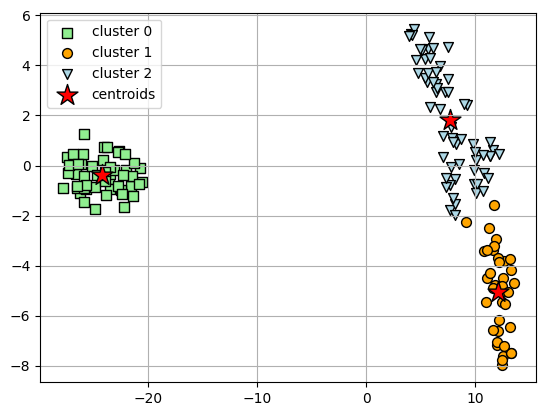

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_tsne[predicao == 0, 0], X_tsne[predicao == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'black', label = 'cluster 0')
plt.scatter(X_tsne[predicao == 1, 0], X_tsne[predicao == 1, 1], s = 50,  c = 'orange', marker = 'o', edgecolor = 'black',  label = 'cluster 1')
plt.scatter(X_tsne[predicao == 2, 0], X_tsne[predicao == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'black', label = 'cluster 2')

# Plota os centroides de cada cluster
plt.scatter(km.cluster_centers_[: , 0], km.cluster_centers_[: , 1], s = 250, marker = '*', c = 'red', edgecolor = 'black', label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()

No código acima, usamos a função `scatter` nativa do `matplotlib` para gerar o gráfico. Ao utilizar diretamente o `matplotlib` , apesar de serem necessários mais parâmetros, temos um controle maior da renderização. Nessa função:

* `X_tsne[predicao == 0, 0]`: Combina a matriz `X_tsne` com a máscara booleana para selecionar todas as amostras (linhas) que pertencem ao cluster `0`. O `, 0` no final do índice indica que estamos interessados apenas na primeira coluna (a primeira dimensão) dessas amostras. Já `X_tsne[predicao == 0, 1]` fornece os valores das características da segunda coluna.
* `s = 50`: Define o tamanho dos marcadores (pontos) no gráfico. Aqui, `s = 50` significa que cada ponto terá um tamanho moderado.
* `c = 'lightgreen'`: Define a cor dos marcadores como verde claro (lightgreen), o que facilita a visualização e a distinção dos pontos pertencentes ao cluster 0.
* `marker = 's'`: Define o formato dos marcadores como quadrados (`s`), diferenciando visualmente os pontos deste cluster dos de outros clusters que podem usar formatos diferentes.
* `edgecolor = 'black'`: Define a cor da borda dos marcadores como preta, o que pode ajudar a destacar os marcadores no gráfico, especialmente se a cor de preenchimento for clara.
* `label = 'cluster 0'`: Define o rótulo (label) deste conjunto de pontos como "cluster 0". Esse rótulo será utilizado na legenda do gráfico, permitindo identificar visualmente quais pontos pertencem ao cluster 0.

O gráfico resultante mostra os três clusters encontrados pelo k-means em diferentes cores, com os centroides destacados em vermelho. Essa visualização nos permite avaliar a separação dos clusters e a proximidade das amostras aos seus centroides.